# Loan Payments Data

#### 2019.07.18 결과

* K-fold를 적용함 : 결과값은 달라지지 않음 -> Train set하고 Test set을 선택했을 때 결과가 달라짐.  
  -> imbalance Data 문제 : 이를 해결 할 방법을 찾아야 함.

#### 참고 사이트 
* https://redhorse046.tistory.com/15
* https://www.kaggle.com/varunmarvah/loan-dataset-analysis-basics

## 단계

1. 데이터 분석 세팅
2. 데이터 탐색
3. 데이터 전처리
4. 모델링

## 1. 데이터 분석 세팅

#### import 패키지

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


#### 필요한 함수 정의

In [2]:
def train_test_diff(train_df_, test_df_, cols):
    
    """ train, test를 각 열 별로 concat 하여 합친 뒤, row로 각 value_counts를 나눈 값을 기준으로
        각 값을 train - test하여 남은 값을 기준으로 train 또는 test로 치우친 정도를 계산함
         -> 비대칭도와 비슷하다고 볼 수 있음.
        
    Parameters
    ----------
    
    train_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
                Training data
                
    test_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
               Test data
               
    cols : list_like,
           columns name list of n_features in train_df_ and test_df_
               
    
    Returns
    -------
    result : pandas(data_frame)_like, shape (n_features,)
             each values of each train_group_value- test_group_value
    
    """
    
    print('\n')
    print('-------------------------------------------------------------------------------------------------------------------------')
    print(f'{cols} distribution graph')
    print('\n')
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_v','test_v']
    result['diff'] = result['train_v'] - result['test_v']
    print(result)
    
    return result

# category 변수에 대하여 target 변수와 train으로 분류한 함수.
def category_dist(train_df_, cols, target_v='price'):
    print('\n')
    print('--------------------------------------------------------------')
    print(f'{cols} distribution')
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    for i in sorted(train_df_[cols].unique()):
        sns.distplot(train_df_.loc[train_df_[cols]==i, target_v], ax=ax[0])
    ax[0].legend(sorted(train_df_[cols].unique()))
    ax[0].set_title(f'{cols} {target_v} distribution')

    sns.boxplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} vs {target_v}')
    
    plt.show()


# category 변수의 train과 test 데이터의 분포 차를 보여주는 함수.
def category_dist_TT(train_df_, test_df_, cols):
    
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_df_','test_df_']
    
    result.fillna(0, inplace=True)
    
    plt.figure(figsize=(15,8))
    sns.distplot(result['train_df_'], label='train')
    sns.distplot(result['test_df_'], label='test')
    plt.legend()
    plt.show()
    
    return result


# numerical 변수의 train데이터에 대한 분포를 보여주는 함수.
def t_category_continous_dist(train_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# numerical 변수의 train과 test 데이터의 분포 차를 보여주는 함수입니다.
def continous_dist_TT(train_df_, test_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    sns.distplot(test_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - train/test distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# 격자를 넣어서 scatter를 표현함.
def scatter_quantile_visualize(df_, col1, col2):
    col1_quant = np.arange(0,1.1,0.1)
    col2_quant = np.arange(0,1.1,0.1)

    for quantile_value in df_[col1].quantile(col1_quant):
        plt.axvline(quantile_value, color='red', alpha=0.3)
    for quantile_value in df_[col2].quantile(col2_quant):
        plt.axhline(quantile_value, color='blue', alpha=0.3)
        
    sns.scatterplot(col1, col2, hue='price',data=df_)
    
    plt.title('{} - {}'.format(col1,col2))
    plt.show()

    

   
    
def check_proportion(df_, cols_list, index_num):
    
    
    """
    *** 현재 column의 값이 상위 몇 %에 있는지 검사함
    input
    df_ : 데이터프레임
    cols_list : target column list
    index_num : 목표 인덱스 번호
    
    return
    result : 숫자로 각 column의 상위 몇 %에 있는지 나타냄.
    """    
    for col in cols_list:
        target = df_.loc[index_num, col]
        result = (target-df_[col].min())/(df_[col].max() - df_[col].min())
        
        print(f'{col} : {result}')
        

        
# -----------------------------------------------------------------------------
def bar_chart(df_, feature, ax_v=None):
    collection_paidoff = df_[df_['loan_status'] == 'COLLECTION_PAIDOFF'][feature].value_counts()
    collection = df_[df_['loan_status'] ==  'COLLECTION'][feature].value_counts()
    paidoff = df_[df_['loan_status'] == 'PAIDOFF' ][feature].value_counts()
    df=pd.DataFrame([collection_paidoff, collection, paidoff])
    df.index = ['COLLECTION_PAIDOFF(0)', 'COLLECTION(1)', 'PAIDOFF(2)']
    if isinstance(ax_v, type(None)) == False:
        df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        df.plot(kind='bar', stacked=True)
    

def x_feature_bar_chart(df_, feature, ax_v=None):
    feature_uni_v = df_[feature].unique().tolist()
    plot_df = pd.DataFrame()
    
    for f in feature_uni_v:
        plot_df[f] = df_[df_[feature] == f]['loan_status'].value_counts()
    plot_df = plot_df.T
    plot_df.fillna(0, inplace=True)
    if isinstance(ax_v, type(None)) == False:
        plot_df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        plot_df.plot(kind='bar', stacked=True)


def category_graph(df_, feature):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    sns.countplot(x=feature, data=df_, palette='Set2', ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')

    bar_chart(df_, feature, ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} distribution')
    
    x_feature_bar_chart(df_, feature, ax[1,0])
    
    
    plt.show()
    

def continue_graph(df_, feature, sub_feature=None):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    df_[feature].hist(ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')
    
    sns.boxplot(x='loan_status', y=feature, data=df_, ax=ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} boxplot')
    
    if isinstance(sub_feature, type(None)) == False:
        sns.boxplot(x='loan_status', y=feature, data=df_, ax=ax[1,0],
                    hue=sub_feature)
    ax[1,0].set_title(f'{feature} and {sub_feature} - loan_status boxplot')
    
    sns.scatterplot(x='loan_status', y=feature, data=df_, ax=ax[1,1])
    
    plt.show()

#### 데이터 불러오기

In [3]:
data = pd.read_csv('./data/Loan_payments_data.csv')

## Data 탐색

#### Variable Description : 자세한 사항은 Loan Data_Description(2019.05.19).xlsx 참조

* Loan_ID	: 대출한 고객의 고유한 ID
* loan_status : 타겟 변수, 상환 여부를 나타냄 -> 타겟 변수
* Principal : 고객이 대출받은 금액
* terms : 대출금 지급까지 걸린 기간
* effective_date : 실제 계약 효과가 발휘하기 시작한 날짜
* due_date : 대출금 납부 기한 날짜
* paid_off_time : 고객이 은행에 모두 상환한 날짜, 시간 -> 타겟 변수를 알아야 쓸 수 있는 데이터이므로 쓰지 않음.
* past_due_days : 고객이 은행에 대출금을 모두 상환하는데 걸린 기간 -> 타겟 변수를 알아야 쓸 수 있는 데이터이므로 쓰지 않음.
* age : 고객의 나이
* education : 고객의 교육 수준
* Gender : 고객의 성별

#### Data 구조

In [4]:
# 데이터 shape
print(f'data shape : {data.shape}')

data shape : (500, 11)


In [5]:
# paid_off_tijme, past_due_days를 제외하면 null값 없음 -> 쓰지 않으므로 삭제함.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [6]:
# 열 제거
data.drop(['paid_off_time', 'past_due_days'], axis=1, inplace=True)

In [7]:
# Principal : 평균이 오른쪽으로 치우쳤음 -> mean이 max값에 가까움.
# terms : 평균이 오른쪽으로 치우쳤음 -> mean이 max값에 가까움.
# age : 평균이 골고루 분포 되었음.

data.describe()

,Principal,terms,age
count,500.000000,500.000000,500.000000
mean,943.200000,22.824000,31.116000
std,115.240274,8.000064,6.084784
min,300.000000,7.000000,18.000000
25%,1000.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


#### column 별 분석

Loan_ID

In [8]:
# Loan_ID
data['Loan_ID'].head()

0    xqd20166231
1    xqd20168902
2    xqd20160003
3    xqd20160004
4    xqd20160005
Name: Loan_ID, dtype: object

In [9]:
# key 값으로 쓸 수 있음 : unique_value = 총 데이터 크기
len(data['Loan_ID'].unique())

500

loan_status : categorical 변수(target 변수)

In [10]:
data['loan_status'].head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [11]:
# 3종류로 나뉨
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

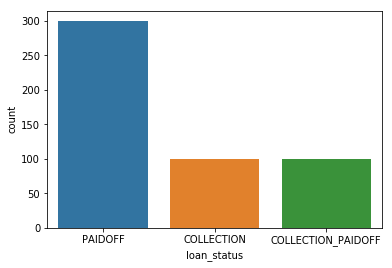

In [12]:
# PAIDOFF이 높은 것을 볼 수 있음. -> 상환이 잘 되었음을 의미함.
sns.countplot(x='loan_status', data=data)

Principal

* 800 ~ 1000에 금액이 몰림. -> 소액 대출은 거의 이루어지지 않음
   => 선형성 낮을 경우 변수 변형 고려 가능.
* 0 : COLLECTION, 1 : COLLECTION_PAIDOFF, 2 : PAIDOFF

----------------------------------------------------------
Principal graph!!!


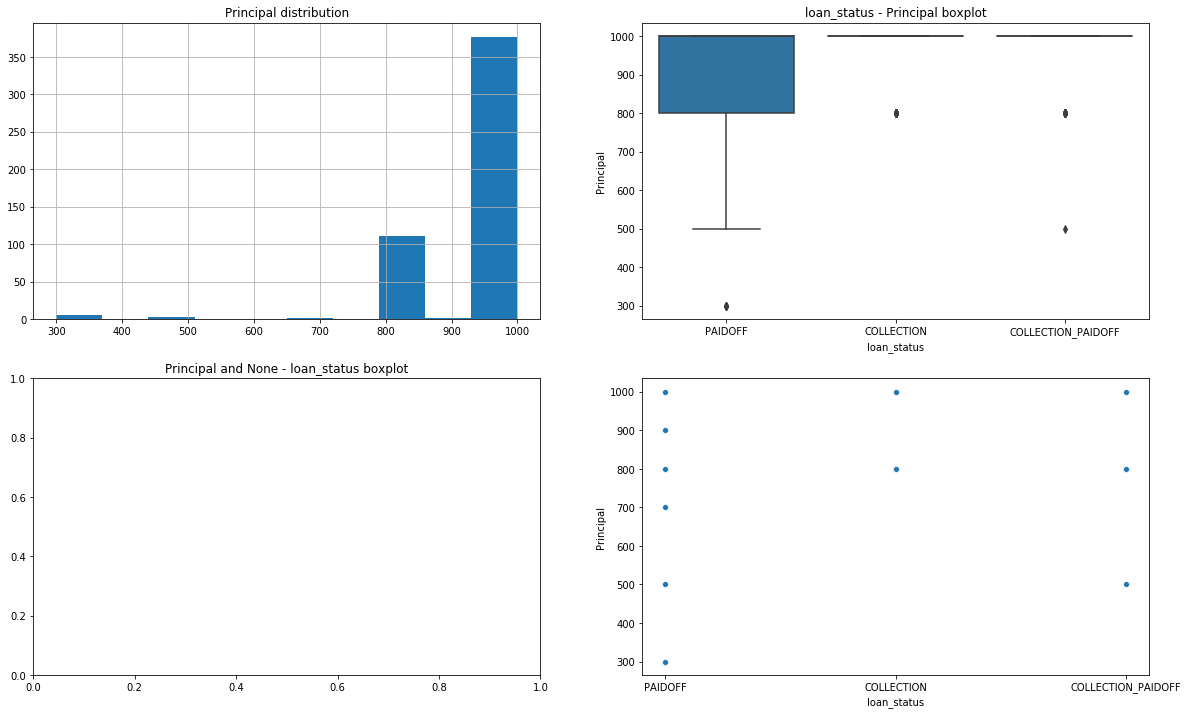

In [18]:
continue_graph(data, 'Principal')

terms 
* 장기 대출이 많음 (30일을 장기 대출로 가정함)
* loan_status는 고르게 분포됨

----------------------------------------------------------
terms graph!!!


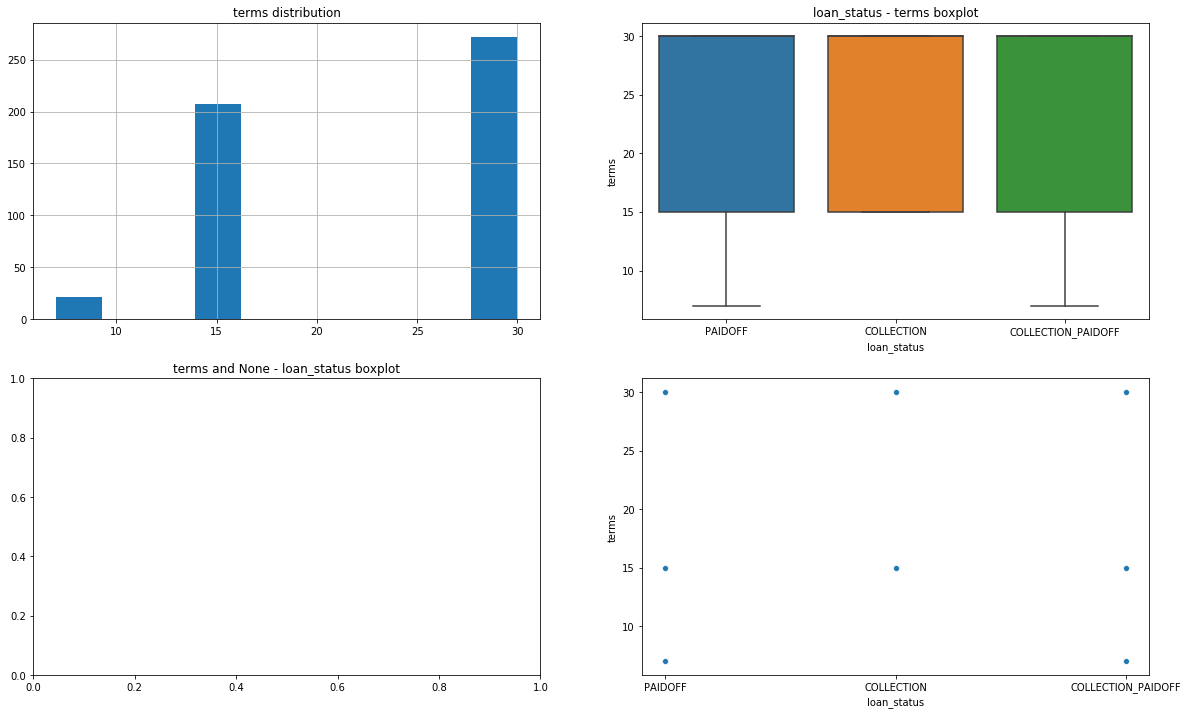

In [19]:
continue_graph(data, 'terms')

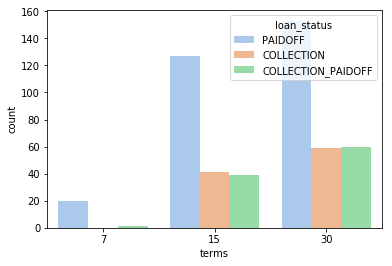

In [20]:
sns.countplot(x="terms", data=data , hue='loan_status', palette='pastel', linewidth=5)

effective_date
* 7개로 나뉘어 있음 -> 일수만 따로 빼서 8~14까지로 데이터 변경 가능
* 9/11/2016에 데이터가 많음
* COLLECTION, COLLECTION_PAIDOFF의 경우 일부만 가지고 있음

In [21]:
data['effective_date'].unique()

array(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016',
       '9/13/2016', '9/14/2016'], dtype=object)

----------------------------------------------------------
effective_date graph!!!


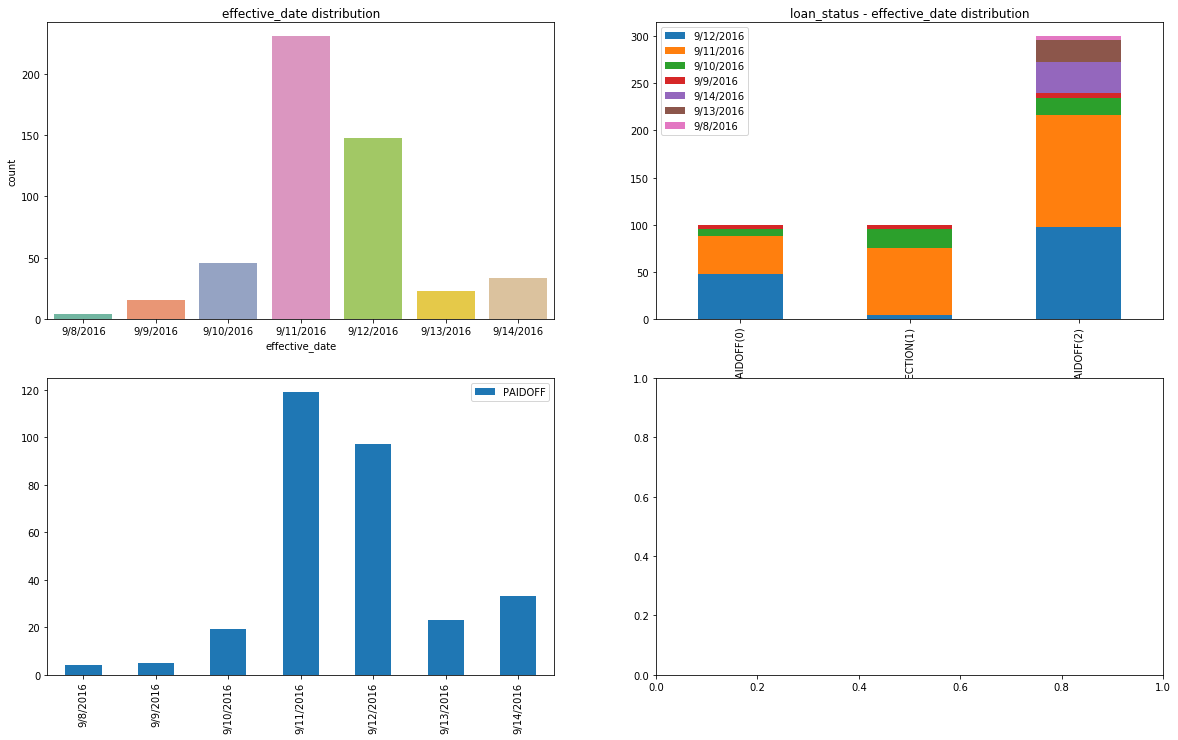

In [22]:
category_graph(data, 'effective_date')

In [23]:
# 날짜 별로 그래프 그려보기
    # 각각 변수에 대해 1이면 해당 변수 발생, 아니면 0으로 함.
temp_paid_off = data['loan_status'].apply(lambda x : 1 if x=='PAIDOFF' else 0)
temp_collection = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION' else 0)
temp_collection_paidoff = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION_PAIDOFF' else 0)
#plt.plot(pd.to_datetime(data['due_date']).unique(), pd.to_datetime(data['due_date']).value_counts())

In [24]:
effective_date_df = pd.concat([pd.to_datetime(data['effective_date']), temp_paid_off, temp_collection, temp_collection_paidoff], axis=1)
effective_date_df.columns = ['effective_date','PAIDOFF','COLLECTION','COLLECTION_PAIDOFF']
#due_date_df = due_date_df.sort_values('due_date').reset_index(drop=True)
effective_date_df['day'] = effective_date_df['effective_date'].apply(lambda x : x.day)
effective_date_df['month'] = effective_date_df['effective_date'].apply(lambda x : x.month)

In [25]:
# 각 날짜의 mean값으로 groupby 함
g_mean_effective_date_df = effective_date_df.groupby('effective_date').mean().reset_index()

# 각 day 별로
g_day_effective_date_df = effective_date_df.groupby('day').mean().reset_index().sort_values('day').reset_index(drop=True)

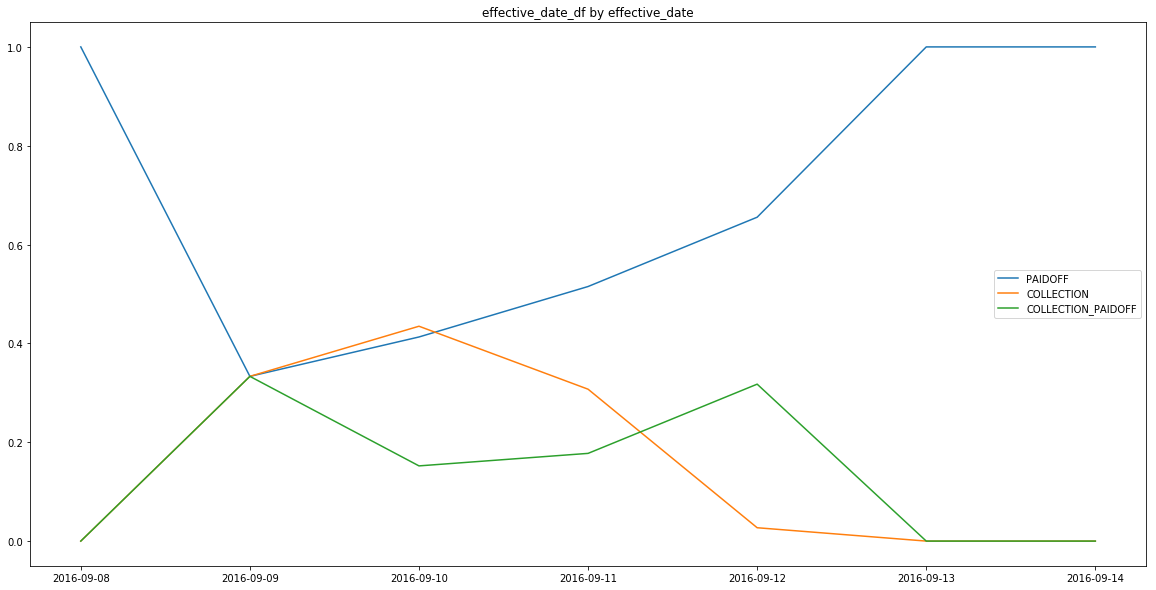

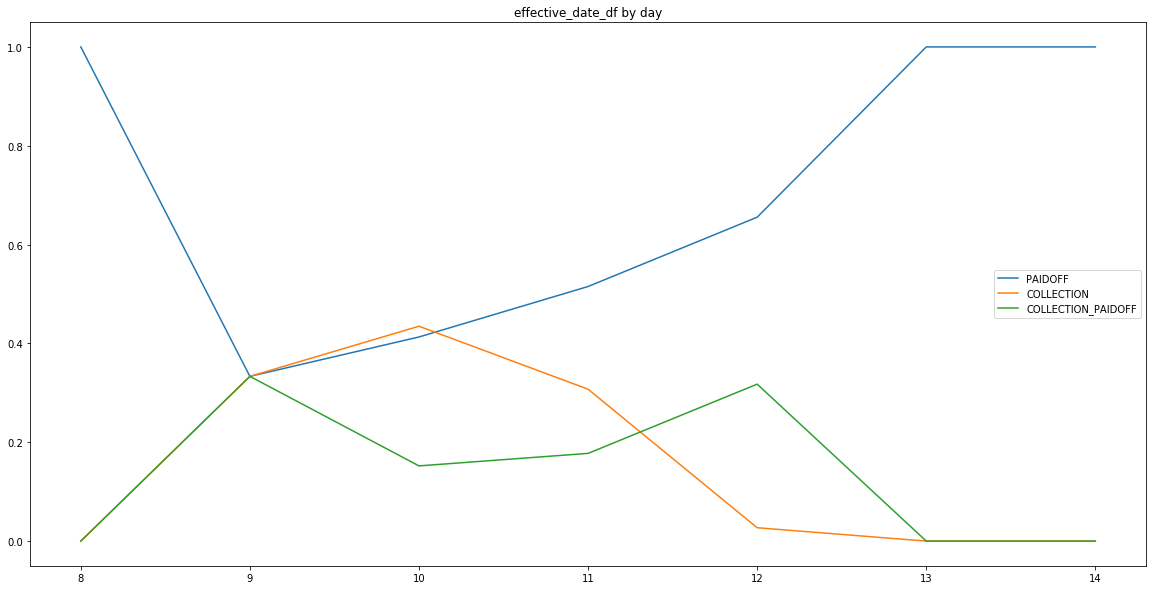

In [26]:
# day로 나눔 : 일별로 하거나 8일, 9일, 10~11일, 12~14일

temp_df_list = [g_mean_effective_date_df, g_day_effective_date_df]

for i in range(len(temp_df_list)):
    x_var = ''
    if i == 0:
        x_var='effective_date'
    elif i ==1:
        x_var = 'day'
    
    plt.figure(figsize=(20,10))
    plt.title('effective_date_df by %s' %str(x_var))
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['PAIDOFF'], label='PAIDOFF')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION'], label='COLLECTION')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION_PAIDOFF'], label='COLLECTION_PAIDOFF')
    plt.legend()
    plt.show()

In [27]:
g_day_effective_date_df

,day,PAIDOFF,COLLECTION,COLLECTION_PAIDOFF,month
0,8,1.000000,0.000000,0.000000,9.0
1,9,0.333333,0.333333,0.333333,9.0
2,10,0.413043,0.434783,0.152174,9.0
3,11,0.515152,0.307359,0.177489,9.0
4,12,0.655405,0.027027,0.317568,9.0
5,13,1.000000,0.000000,0.000000,9.0
6,14,1.000000,0.000000,0.000000,9.0


In [28]:
# day로 나눔 : 일별로 하거나 8일, 9일, 10~11일, 12~14일

due_date
* 25개로 나뉨
* 각 날짜별로는 크리티컬 여부는 알 수 없음.

In [29]:
data['due_date'].unique()

array(['10/7/2016', '9/22/2016', '10/8/2016', '9/15/2016', '9/24/2016',
       '9/16/2016', '10/9/2016', '10/10/2016', '9/25/2016', '9/17/2016',
       '11/9/2016', '10/25/2016', '9/18/2016', '9/26/2016', '10/26/2016',
       '10/11/2016', '11/10/2016', '9/19/2016', '10/12/2016', '9/27/2016',
       '9/28/2016', '10/13/2016', '11/12/2016', '9/23/2016', '11/7/2016'],
      dtype=object)

----------------------------------------------------------
due_date graph!!!


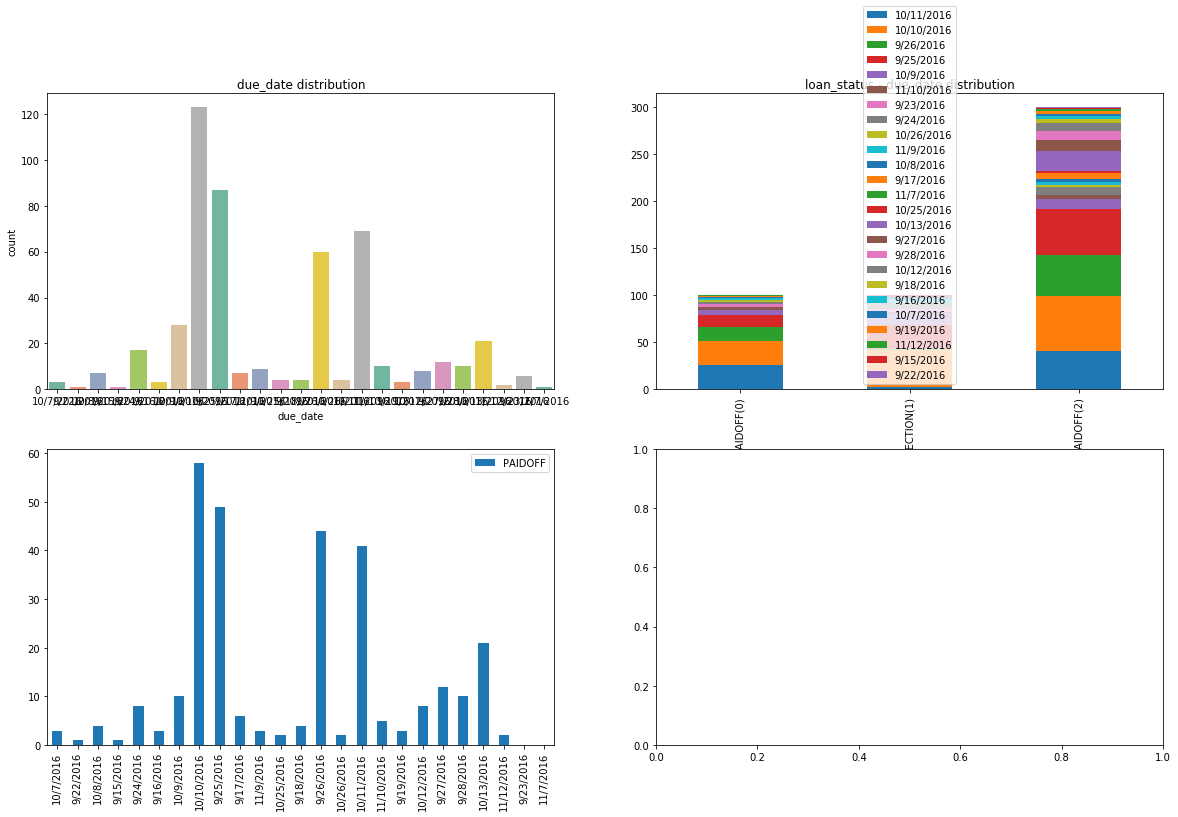

In [30]:
category_graph(data, 'due_date')

In [31]:
# 날짜 별로 그래프 그려보기
    # 각각 변수에 대해 1이면 해당 변수 발생, 아니면 0으로 함.
temp_paid_off = data['loan_status'].apply(lambda x : 1 if x=='PAIDOFF' else 0)
temp_collection = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION' else 0)
temp_collection_paidoff = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION_PAIDOFF' else 0)
#plt.plot(pd.to_datetime(data['due_date']).unique(), pd.to_datetime(data['due_date']).value_counts())

In [32]:

due_date_df = pd.concat([pd.to_datetime(data['due_date']), temp_paid_off, temp_collection, temp_collection_paidoff], axis=1)
due_date_df.columns = ['due_date','PAIDOFF','COLLECTION','COLLECTION_PAIDOFF']
#due_date_df = due_date_df.sort_values('due_date').reset_index(drop=True)
due_date_df['day'] = due_date_df['due_date'].apply(lambda x : x.day)
due_date_df['month'] = due_date_df['due_date'].apply(lambda x : x.month)

In [33]:
# 각 날짜의 mean값으로 groupby 함
g_mean_due_date_df = due_date_df.groupby('due_date').mean().reset_index()

# 각 day 별로
g_day_due_date_df = due_date_df.groupby('day').mean().reset_index().sort_values('day').reset_index(drop=True)

# 각 month 별로
g_month_due_date_df = due_date_df.groupby('month').mean().reset_index().sort_values('month').reset_index(drop=True)

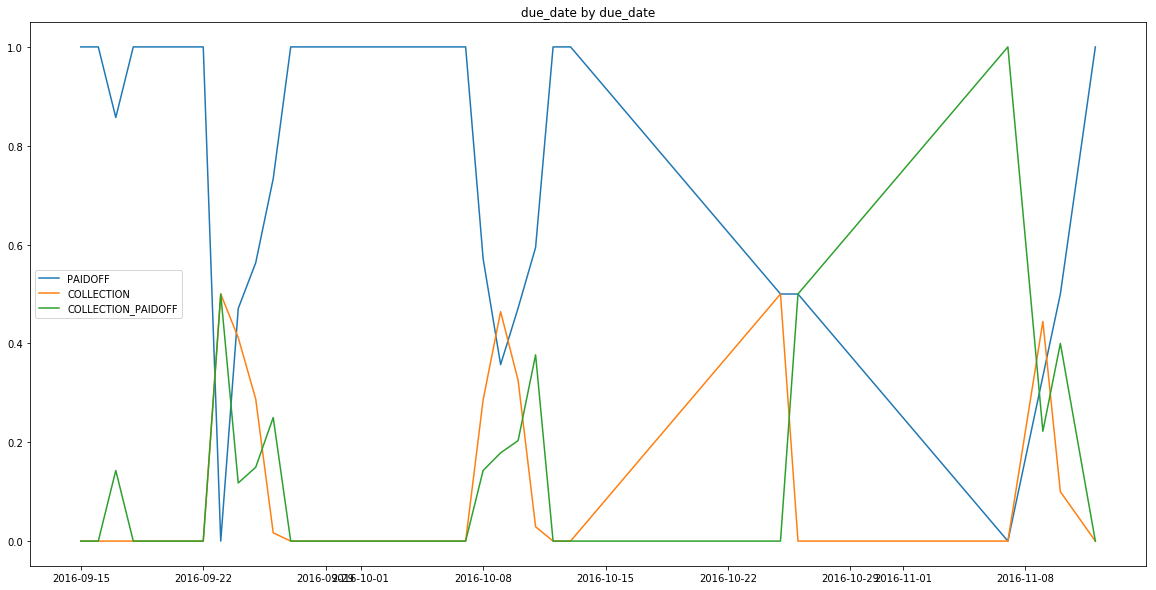

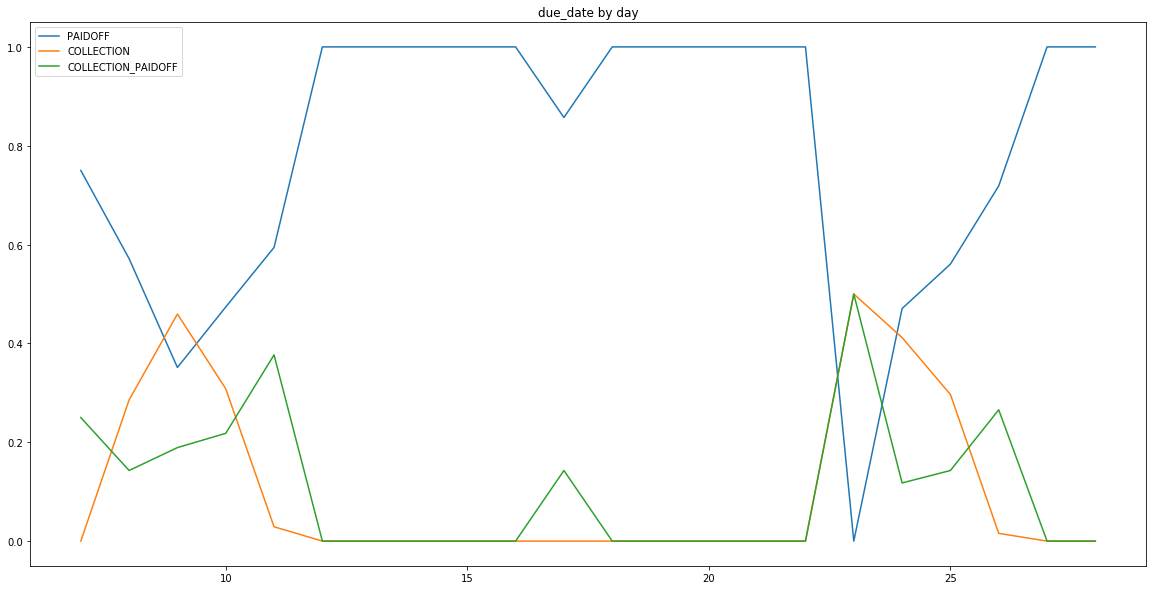

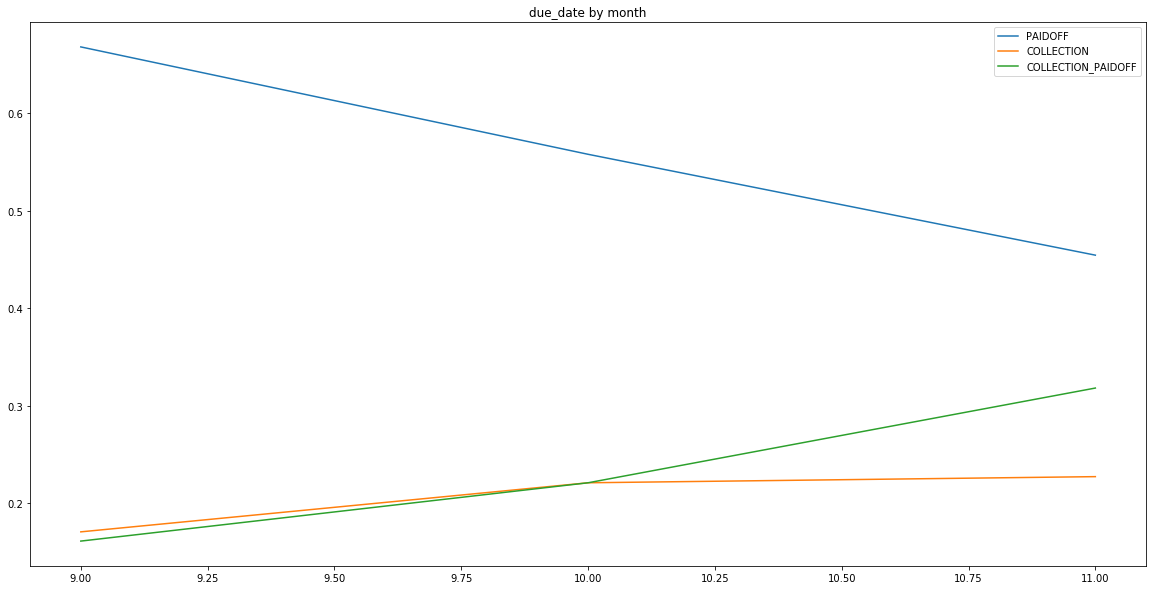

In [34]:
# month로 함, 또는 그래프 기준.

temp_df_list = [g_mean_due_date_df, g_day_due_date_df, g_month_due_date_df]

for i in range(len(temp_df_list)):
    x_var = ''
    if i == 0:
        x_var='due_date'
    elif i ==1:
        x_var = 'day'
    else:
        x_var = 'month'
    
    plt.figure(figsize=(20,10))
    plt.title('due_date by %s' %str(x_var))
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['PAIDOFF'], label='PAIDOFF')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION'], label='COLLECTION')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION_PAIDOFF'], label='COLLECTION_PAIDOFF')
    plt.legend()
    plt.show()

In [35]:
# 숫자로 보기. : 낙하 구간과 평평이로 나누기. ->  7~11, 24 ~ 26, 나머지
g_day_due_date_df

,day,PAIDOFF,COLLECTION,COLLECTION_PAIDOFF,month
0,7,0.750000,0.000000,0.250000,10.250000
1,8,0.571429,0.285714,0.142857,10.000000
2,9,0.351351,0.459459,0.189189,10.243243
3,10,0.473684,0.308271,0.218045,10.075188
4,11,0.594203,0.028986,0.376812,10.000000
5,12,1.000000,0.000000,0.000000,10.200000
6,13,1.000000,0.000000,0.000000,10.000000
7,15,1.000000,0.000000,0.000000,9.000000
8,16,1.000000,0.000000,0.000000,9.000000
9,17,0.857143,0.000000,0.142857,9.000000


In [36]:
# 숫자로 보기 : 낙하 구간과 평평이로 나누기. ->  7~11, 24 ~ 26, 나머지



age
* 정규분포 모양으로 분포 되어있음

----------------------------------------------------------
age graph!!!


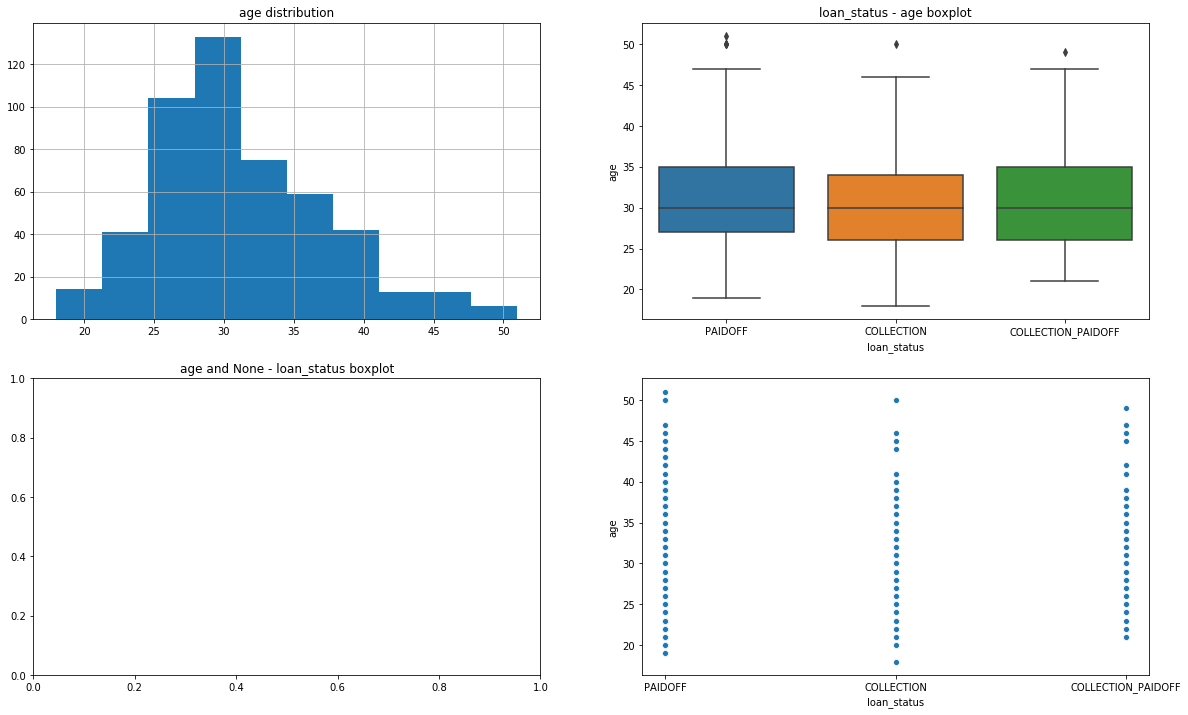

In [37]:
continue_graph(data, 'age')

education
* High School, College가 제일 많음
* Master or Above의 경우 PAIDOFF에만 있음
* 그외 변수는 타겟변수에 대해 전체적으로 고르게 분포함

----------------------------------------------------------
education graph!!!


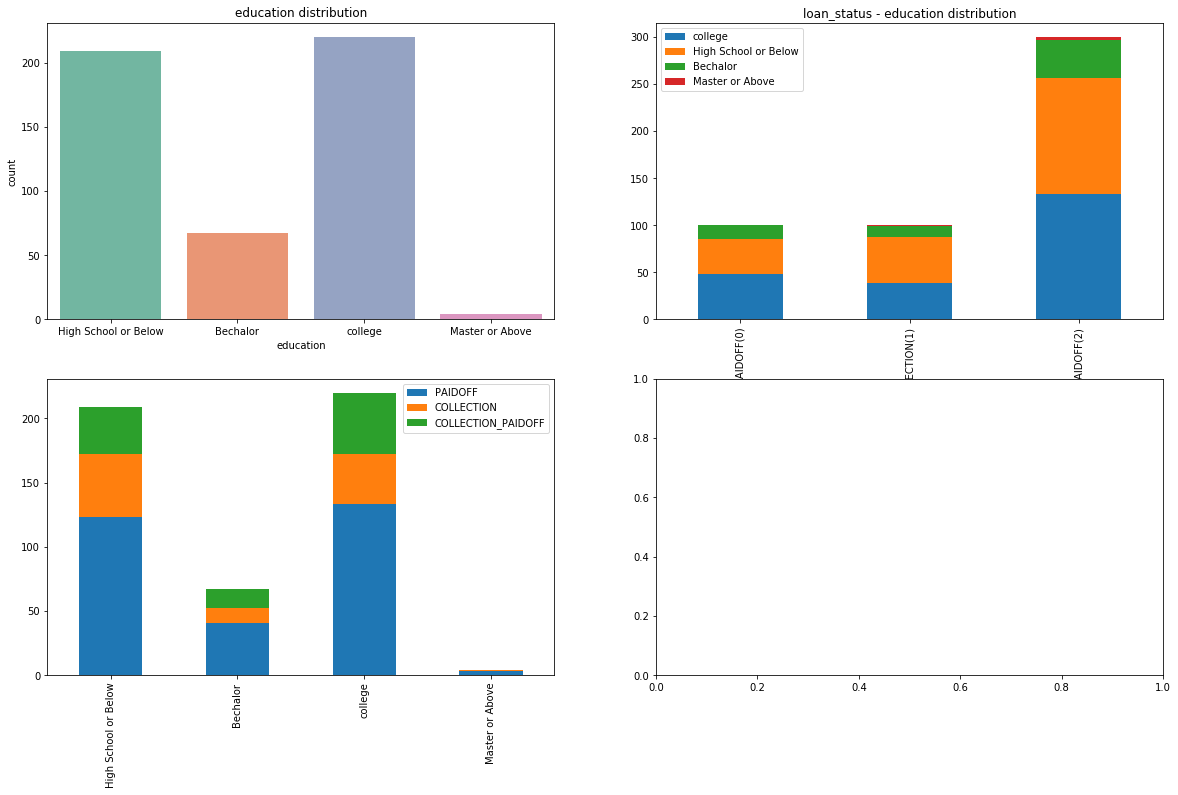

In [38]:
category_graph(data, 'education')

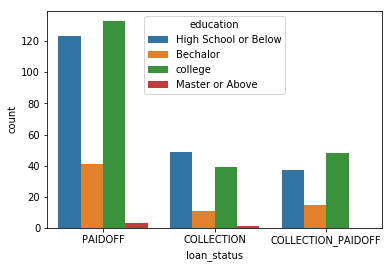

In [39]:
sns.countplot(x="loan_status", data=data, hue='education')

<Figure size 1440x1080 with 0 Axes>

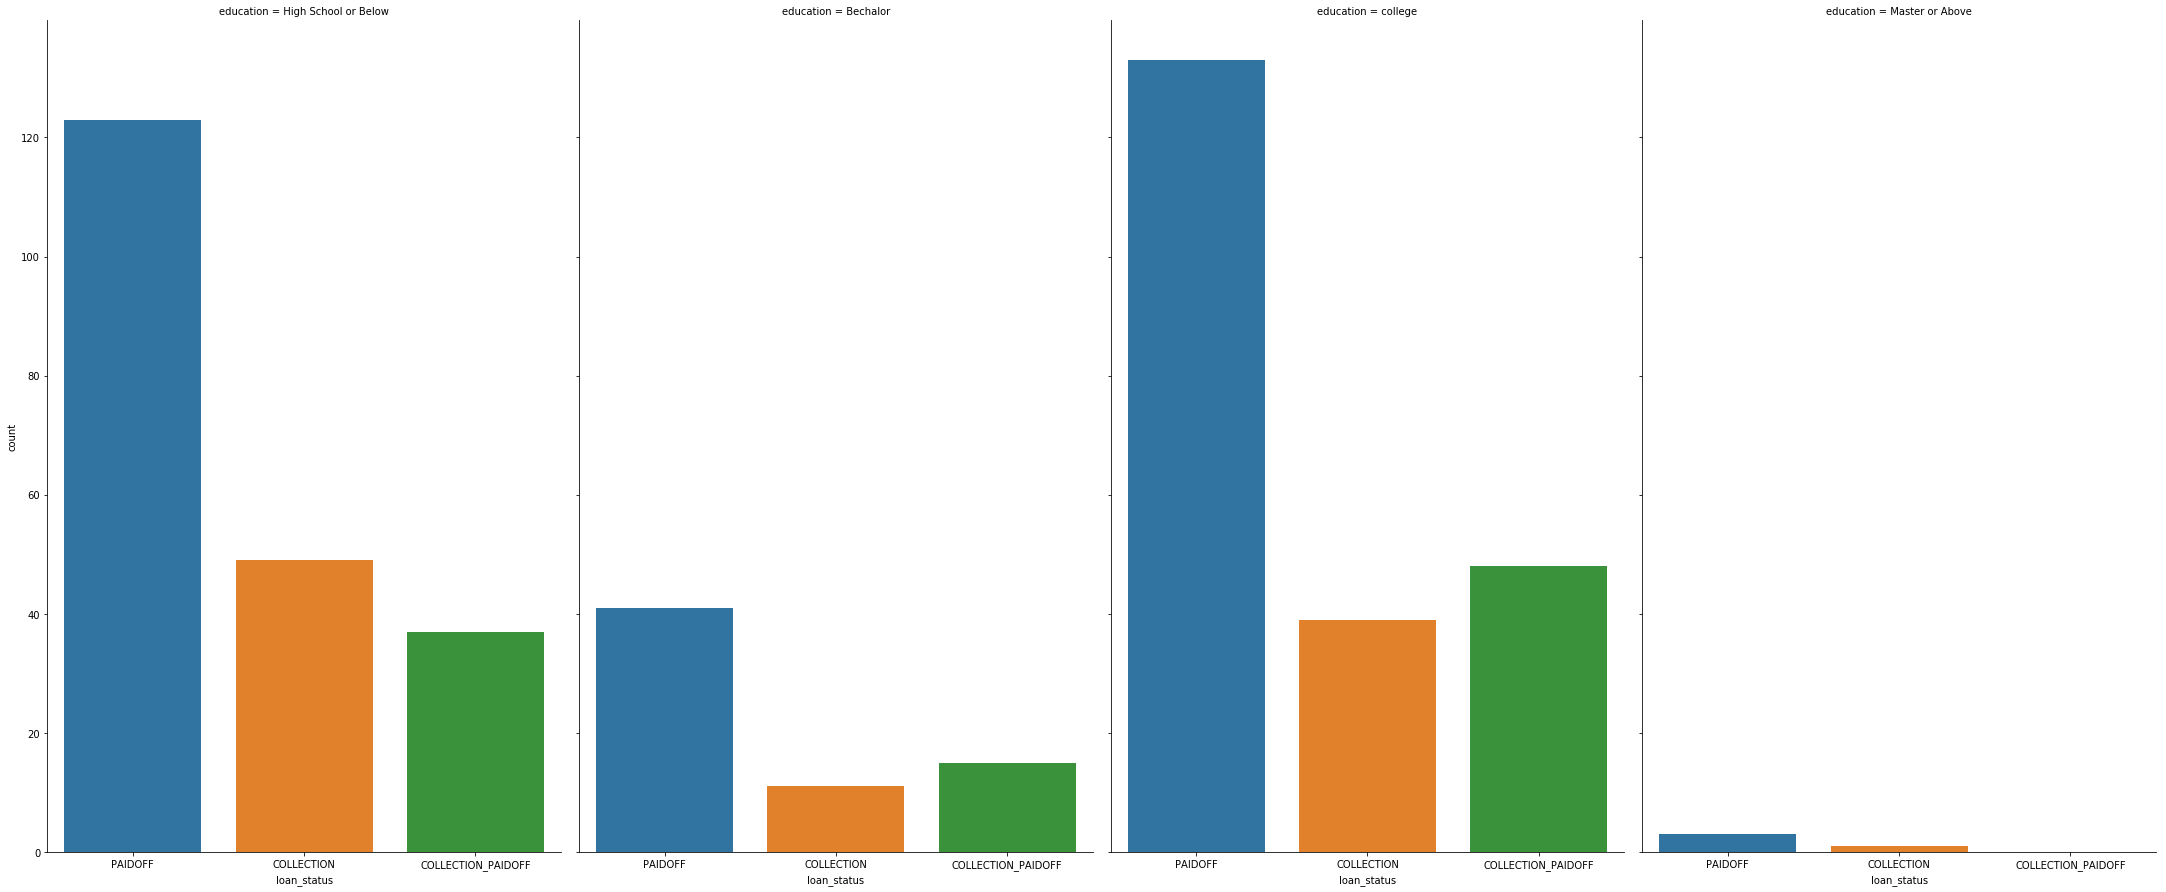

In [40]:
plt.figure(figsize=(20,15))
g = sns.catplot("loan_status", col="education", col_wrap=4,
                 data=data[data.loan_status.notnull()],
                 kind="count", height=12.5, aspect=.6)

Gender
* 남성이 많음
* 여성 비율이 PAIDOFF에서 조금 높게 나타남

----------------------------------------------------------
Gender graph!!!


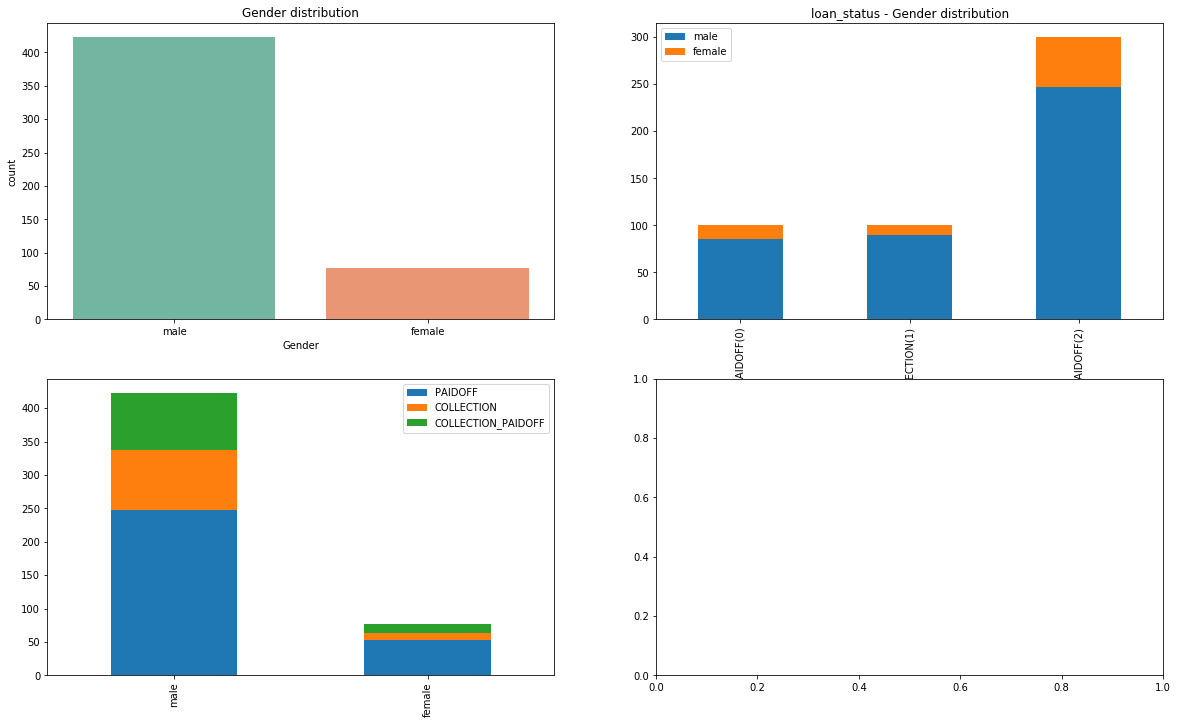

In [41]:
category_graph(data, 'Gender')

#### 변수 정제 : 더미 변수들을 정제하여 2개 이상 조합해서 분석

In [42]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [43]:
# Loan_ID : key값이므로 그냥 삭제함
data = data.drop('Loan_ID', axis=1)

In [44]:
# loan_status : 0이면 PAIDOFF, 1이면 COLLECTION, 2이면 COLLECTION_PAIDOFF
# effective_date : to.datetime으로 바꿈.
# due_date : to.datetime으로 바꿈.
# education : 0이면 High School or Below, 1이면 college, 2이면 Bechalor, 3이면 Master or Above
# Gender : 0이면 여자, 1이면 남자

def loan_status_dummy(x):
    if x == 'PAIDOFF' :
        return 0
    elif x == 'COLLECTION' :
        return 1
    elif x == 'COLLECTION_PAIDOFF' :
        return 2
    else:
        raise ValueError('not value')
    
def edu_dummy(x):
    if x == 'High School or Below' :
        return 0
    elif x == 'college' :
        return 1
    elif x == 'Bechalor' :
        return 2
    elif x == 'Master or Above' :
        return 3
    else :
        raise ValueError('not value')

data['loan_status'] = data['loan_status'].apply(lambda x : loan_status_dummy(x))
data['education'] = data['education'].apply(lambda x : edu_dummy(x))
data['Gender'] = data['Gender'].apply(lambda x : 1 if x == 'male' else 0)

data['effective_date'] = pd.to_datetime(data['effective_date'])
data['due_date'] = pd.to_datetime(data['due_date'])
data['due_date_month'] = data['due_date'].apply(lambda x : x.month)
data['due_date_day'] = data['due_date'].apply(lambda x : x.day)

data['effective_date_day'] = data['effective_date'].apply(lambda x : x.day)




# 위에서 due_date, effective_date를 선형으로 바꾸는 변수 추가함.
def due_date_line(x):
    if x >= 7 and x<=11 :
        return 0
    elif x >=24 and x<=26 :
        return 1
    else :
        return 2

data['due_line_day'] = data['due_date_day'].apply(lambda x : due_date_line(x))


def effective_date_line(x):
    if x == 8:
        return 0
    elif x == 9:
        return 1
    elif x >=10 and x<=11:
        return 2
    else :
        return 3
    
data['eff_line'] = data['effective_date_day'].apply(lambda x : effective_date_line(x))



In [45]:
data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due_date_month,due_date_day,effective_date_day,due_line_day,eff_line
0,0,1000,30,2016-09-08,2016-10-07,45,0,1,10,7,8,0,0
1,0,1000,30,2016-09-08,2016-10-07,50,2,0,10,7,8,0,0
2,0,1000,30,2016-09-08,2016-10-07,33,2,0,10,7,8,0,0
3,0,1000,15,2016-09-08,2016-09-22,27,1,1,9,22,8,2,0
4,0,1000,30,2016-09-09,2016-10-08,28,1,0,10,8,9,0,1


#### 변수 2개 이상 조합해서 보기
* 'due_date' - 'effective_date' : terms와 같은 변수 발생

due_Date, effective_date : 'due_date' - 'effective_date'를 하면 'terms'와 1일 차이나는 변수가 나옴

In [46]:
(data['due_date'] - data['effective_date']).head()

0   29 days
1   29 days
2   29 days
3   14 days
4   29 days
dtype: timedelta64[ns]

In [47]:
data['terms'].head()

0    30
1    30
2    30
3    15
4    30
Name: terms, dtype: int64

Principal, terms : Pincipal을 terms로 나누면 1일 평균 상환해야 할 금액 -> 'per_d_principal' 변수로 정의

In [51]:
data['per_d_principal'] = data['Principal'] / data['terms']

----------------------------------------------------------
per_d_principal graph!!!


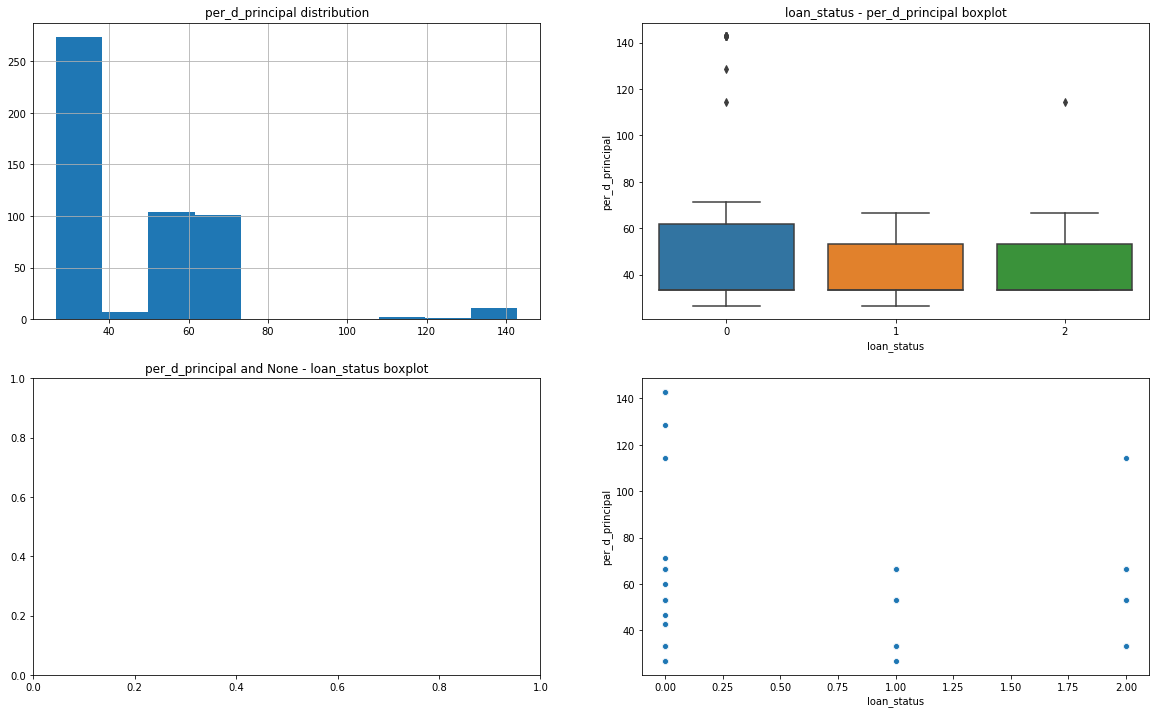

In [52]:
# 'per_d_principal' 변수 보기
continue_graph(data, 'per_d_principal')

Education, Gender, loan_status
* 20~40대가 대출의 주류를 이룸

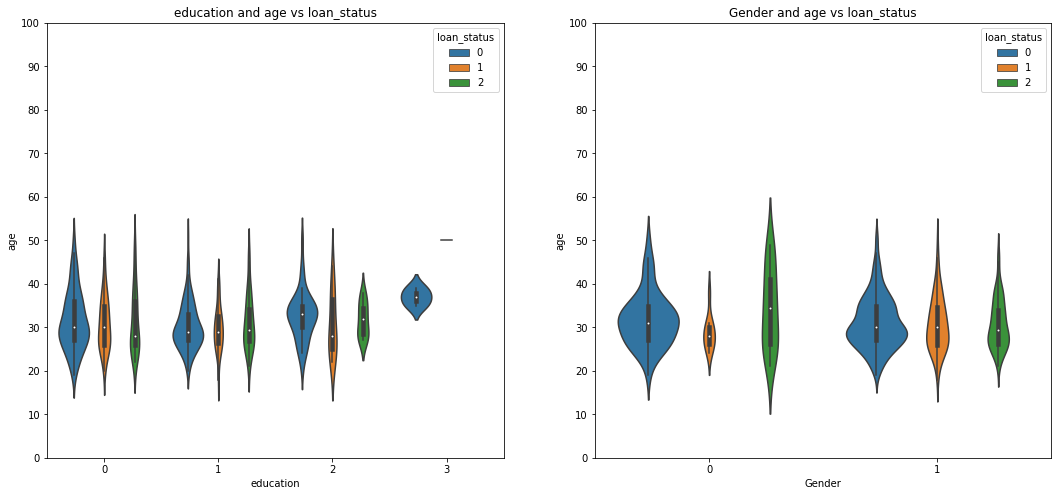

In [49]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("education","age", hue="loan_status", data=data, scale='count', ax=ax[0])
ax[0].set_title('education and age vs loan_status')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Gender","age", hue="loan_status", data=data, scale='count', ax=ax[1])
ax[1].set_title('Gender and age vs loan_status')
ax[1].set_yticks(range(0,110,10))
plt.show()

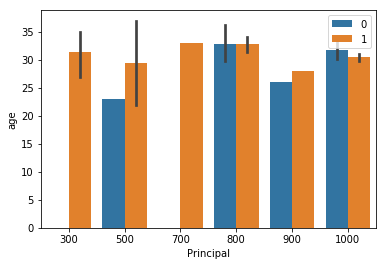

In [50]:
# 나이, 성별과 대출액을 봄.
    # 1: 남자
ax = sns.barplot(x="Principal", y="age",hue="Gender" ,  data=data)
ax.legend(loc="upper right")

#### 변수간 상관관계

-0.039207802652813366


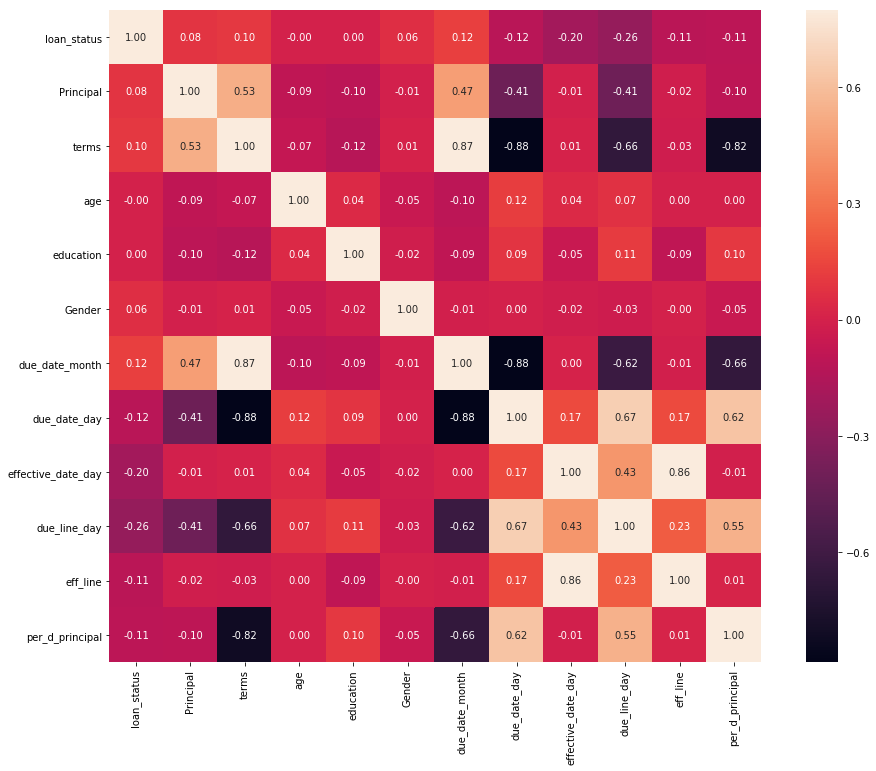

In [53]:
continuous_value = ['loan_status', 'Principal',  'age', 'per_d_principal']

# 상관관계
corrmat = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f");

# 평균 상관관계 계수
print(corrmat.iloc[0,1:].mean())

# 겁나게 낮게 나옴.

In [54]:
data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due_date_month,due_date_day,effective_date_day,due_line_day,eff_line,per_d_principal
0,0,1000,30,2016-09-08,2016-10-07,45,0,1,10,7,8,0,0,33.333333
1,0,1000,30,2016-09-08,2016-10-07,50,2,0,10,7,8,0,0,33.333333
2,0,1000,30,2016-09-08,2016-10-07,33,2,0,10,7,8,0,0,33.333333
3,0,1000,15,2016-09-08,2016-09-22,27,1,1,9,22,8,2,0,66.666667
4,0,1000,30,2016-09-09,2016-10-08,28,1,0,10,8,9,0,1,33.333333


## Data 분석

#### dummy 변수 편집 : factor들을 column으로 나눔
* education : 더미변수 처리


In [55]:
data_c = data.copy()
data = data_c.copy()

In [56]:
# 더미 변수 처리
dummy_list = [['education','edu'],['due_line_day','due_lines'],['eff_line','eff_lines']]
for i,j in dummy_list:
    temp_edu = pd.get_dummies(data[i], prefix=j, drop_first = True)
    data = pd.concat([data,temp_edu], axis=1)

In [57]:
x_variable = ['Principal','terms','age','Gender','effective_date_day','due_date_month','per_d_principal','edu_1','edu_2', 'edu_3']
#x_variable = ['Principal','terms','age','Gender','due_lines_1','due_lines_2','eff_lines_1','eff_lines_2','eff_lines_3','per_d_principal','edu_1','edu_2', 'edu_3']

y_variable = ['loan_status']

In [58]:
data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due_date_month,due_date_day,...,eff_line,per_d_principal,edu_1,edu_2,edu_3,due_lines_1,due_lines_2,eff_lines_1,eff_lines_2,eff_lines_3
0,0,1000,30,2016-09-08,2016-10-07,45,0,1,10,7,...,0,33.333333,0,0,0,0,0,0,0,0
1,0,1000,30,2016-09-08,2016-10-07,50,2,0,10,7,...,0,33.333333,0,1,0,0,0,0,0,0
2,0,1000,30,2016-09-08,2016-10-07,33,2,0,10,7,...,0,33.333333,0,1,0,0,0,0,0,0
3,0,1000,15,2016-09-08,2016-09-22,27,1,1,9,22,...,0,66.666667,1,0,0,0,1,0,0,0
4,0,1000,30,2016-09-09,2016-10-08,28,1,0,10,8,...,1,33.333333,1,0,0,0,0,1,0,0


#### train, test set으로 분할

In [141]:
X = data.loc[:,x_variable]
y = data.loc[:,y_variable].values.reshape(len(data),)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

#### RandomForest

In [167]:

clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0, min_samples_leaf = 10)
clf.fit(X_train, y_train)  

print(clf.feature_importances_)
print(clf.score(X_test,y_test))

[0.02337228 0.07914362 0.17233579 0.04018363 0.50592134 0.04575731
 0.06035463 0.04070648 0.03222492 0.        ]
0.648


#### K-fold
* https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/
* https://woolulu.tistory.com/70

##### 설명
* Train data set을 K개로 나눠서 K-1개는 Train, 1개는 validation data set으로 하여 K개의 모델을 돌리면서 최적의 모델을 추출 하는 것
* HyperParameter 추정시, 각 HyperParameter에 대해 K번 학습을 수행하는데 여기서 나온 제일 높은 값 또는 평균값을 기준으로 제일 높은 값의 HyperParameter값을 쓰게 됨.

In [168]:
# 구현
from sklearn.model_selection import KFold
def sel_model_by_K(X_data_, y_data_, model_, k_, shuffle_=False):
    X_data_ = X_data_.values  
    
    d_len = len(X_data_)
    val_d_len = int(d_len/k_)
    
    data_ind = np.array([i for i in range(d_len)])
    candidate_ind = np.array([i for i in range(d_len)])
    
    test_score_list = []
    clf_list = []
    f_test_score = 0
    f_model = 0
    for k in range(k_):
        val_ind = 0
        
        if k <= k_:
            if shuffle_ == True:
                
                val_ind = np.random.choice(candidate_ind, val_d_len, replace=False)
                #print(len(candidate_ind))
                #print(val_d_len)
            else:
                val_ind = [i for i in range(k*val_d_len,(k+1)*k*val_d_len)]
        else:
            if shuffle_ == True:
                val_ind = np.random.choice(candidate_ind, len(candidate_ind), replace=False)
                candidate_ind = data_ind.copy()
                candidate_ind = candidate_ind[~np.isin(candidate_ind, val_ind)]
                
                temp_ind = np.random.choice(candidate_ind, val_d_len, replace=False)
                val_ind = np.append(val_ind,candidate_ind)
                
            else:
                val_ind = [i for i in range(k*val_d_len,(k+1)*k*val_d_len)]
                candidate_ind = data_ind.copy()
                candidate_ind = candidate_ind[~np.isin(candidate_ind, val_ind)]
                
                temp_ind = np.random.choice(candidate_ind, val_d_len, replace=False)
                val_ind = np.append(val_ind,candidate_ind)
        
        train_ind = data_ind[~np.isin(data_ind,val_ind)]

        X_val_ = X_data_[val_ind,:]
        y_val_ = y_data_[val_ind]
        X_train_ = X_data_[train_ind,:]
        y_train_ = y_data_[train_ind]
        
        
        candidate_ind = candidate_ind[~np.isin(candidate_ind, val_ind)]
        

        clf = model_
        clf.fit(X_train_, y_train_)
        test_score = clf.score(X_val_,y_val_)
        test_score_list.append(test_score)
        clf_list.append(clf)
        if test_score >= f_test_score :
            f_test_score = test_score
            f_model = clf
        
        #print(k)
        
    print(test_score_list)
    print('The highest score : %f' %f_test_score)
    
    return clf, clf_list



In [169]:
# validation set에서는 최고 기록이 0.78이 나옴.
model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, min_samples_leaf = 10)
f_clf, f_clf_list = sel_model_by_K(X_train, y_train, model, 20, shuffle_=True)

[0.5, 0.5555555555555556, 0.6111111111111112, 0.6111111111111112, 0.5, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.7777777777777778, 0.6666666666666666, 0.4444444444444444, 0.5555555555555556, 0.5, 0.5, 0.6666666666666666, 0.5, 0.5, 0.4444444444444444, 0.6111111111111112, 0.5555555555555556]
The highest score : 0.777778


In [175]:
# test set으로 하면 20개의 모델에 대해 모두 같은 값이 나옴.
    
for clfs in f_clf_list:
    print(clfs.score(X_test,y_test))
    
# imbalance 데이터여서 이에 대한 해결책 필요
print(f_clf_list[0].predict(X_test))

0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
0.648
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Feature ranking:
1. feature 4 (0.500273)
2. feature 2 (0.235644)
3. feature 7 (0.057943)
4. feature 5 (0.053548)
5. feature 6 (0.053034)
6. feature 1 (0.034812)
7. feature 0 (0.028304)
8. feature 8 (0.023486)
9. feature 3 (0.012956)
10. feature 9 (0.000000)


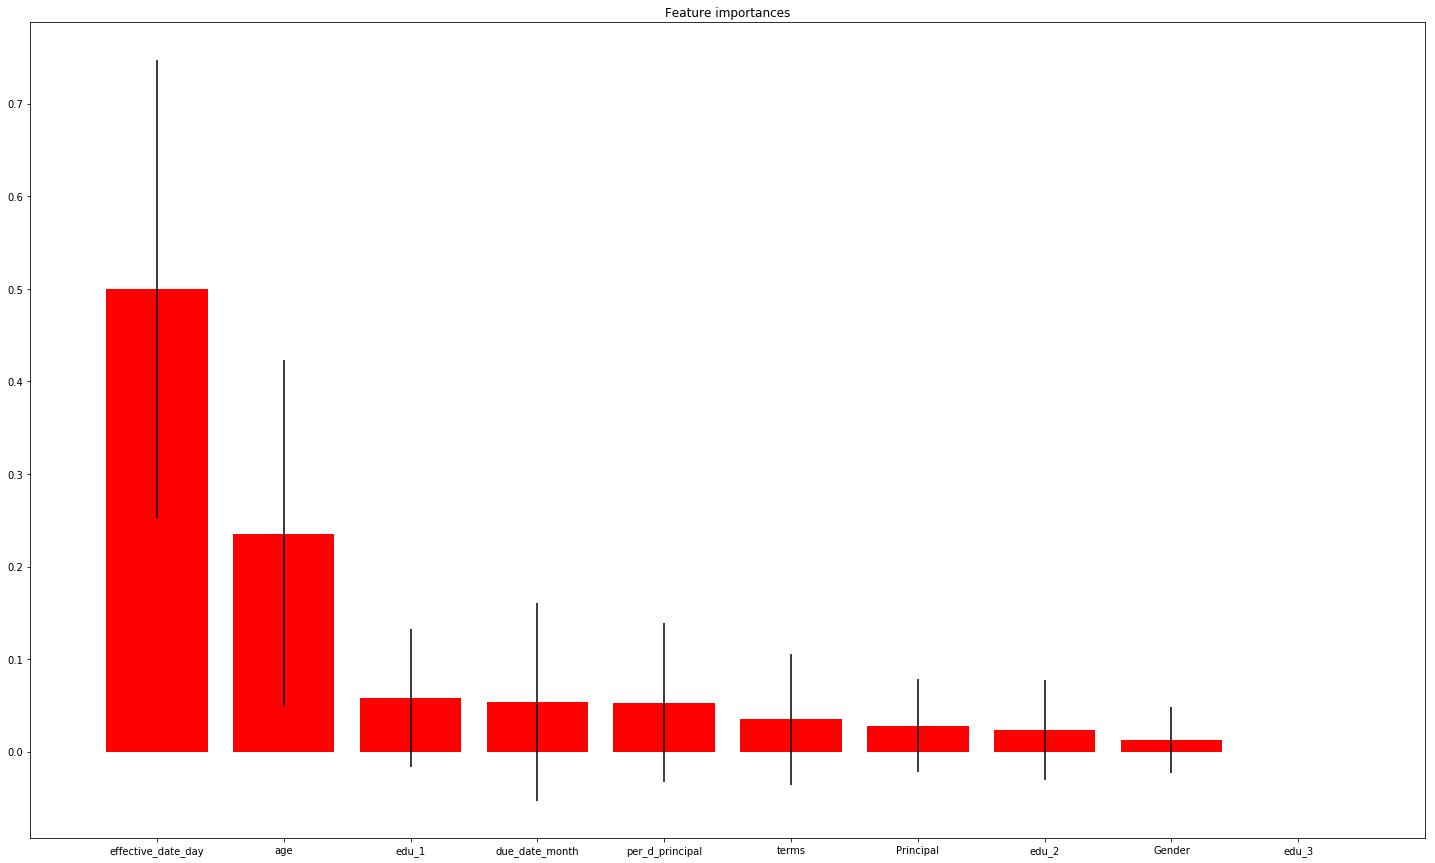

In [418]:
# feature importance 구하기

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_names = X_train.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(25,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

#### Support vector Machine

In [174]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
clf.predict(X_train)

0.648


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,